In [2]:
%pylab inline
from pandas import *

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


our function[2289, 88, 123]


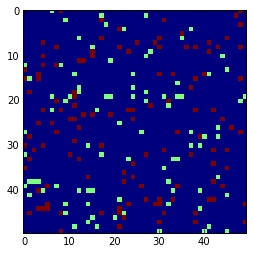

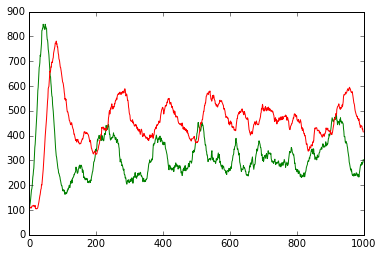

In [6]:
# Initialization

import random

def countTheZoo(theArea):
    myCounter=[0,0,0]
    for x in range(len(theArea)):
        for y in range(len(theArea[x])):
            myCounter[theArea[x][y]]=myCounter[theArea[x][y]]+1             
    return myCounter

def populateZoo(theArea,withWhat,howMany):
    for n in range(howMany):
        x=random.randint(0,xDim-1)
        y=random.randint(0,yDim-1)
        while area[x][y]!=0:
            x=random.randint(0,xDim-1)
            y=random.randint(0,yDim-1)
        area[x][y]=withWhat
    return theArea

def getNewLocation(x,y,xBound,yBound):
    xO=0
    yO=0
    while ((xO==0)and(yO==0)) or ((x+xO)<0 or (x+xO)>=xBound) or ((y+yO)<0) or ((y+yO)>=yBound):
        xO=random.randint(-1,1)
        yO=random.randint(-1,1) 
    return x+xO,y+yO

area = list()
xDim=50
yDim=50
nStartBunny=88
nStartRaptor=123

# make area empty
for x in range(xDim):
    area.append(list())
    for y in range(yDim):
        area[x].append(0)
 
        
area=populateZoo(area,1,nStartBunny)
area=populateZoo(area,2,nStartRaptor)

imshow(area,interpolation="nearest")    
print "our function" + str(countTheZoo(area))

bunny=list()
raptor=list()
countCounter=0
# main simulation loop
for t in range(1000000):
    #pick random location
    countCounter=countCounter+1
    x=random.randint(0,xDim-1)
    y=random.randint(0,yDim-1)
    # do bunny things
    if area[x][y]==1: #bunny
        nX,nY=getNewLocation(x,y,xDim,yDim)
        if random.random()>0.5:
            #do the hopping
            if area[nX][nY]==0:
                area[nX][nY]=1
                area[x][y]=0
        else:
            #do offspring
            if area[nX][nY]==0:
                area[nX][nY]=1
                #area[x][y]=0 now we don't clear the space, we create a new bunny
    else:
        if area[x][y]==2:
            nX,nY=getNewLocation(x,y,xDim,yDim)
            if area[nX][nY]==1:
                # jumped on a bunny -> reproduce
                area[nX][nY]=2
            else:
                if area[nX][nY]==0:
                #jumped on an empty spot -> just jump here
                    area[nX][nY]=2
                    area[x][y]=0
        
    #stuff to happen
    #print str(t)+" "+str(countTheZoo(area))
    
    #randomly kill something here
    if random.random()<0.1:
        x=random.randint(0,xDim-1)
        y=random.randint(0,yDim-1)
        area[x][y]=0
    if countCounter>1000:
        V=countTheZoo(area)
        bunny.append(V[1])
        raptor.append(V[2])
        countCounter=0
figure()
plot(bunny,'g')
plot(raptor,'r')

In [7]:
#print area
# localizing on a grid cell
#print area
#print area[15]
#print area[15][2]

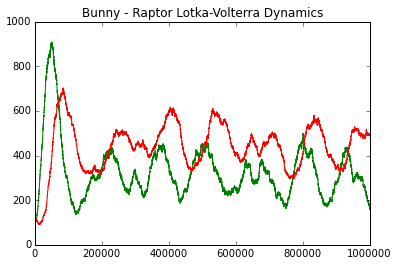

In [6]:
from pylab import *
from optparse import OptionParser

figure()
plot(bunny,'g')
plot(raptor,'r')
title('Bunny - Raptor Lotka-Volterra Dynamics')
savefig('BunnyVsRaptor.pdf')